# Libraries

In [1]:
# install.packages('')

In [7]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=4,repr.plot.height=4)
library(rpart)

# Read data

In [2]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 3 - Classification/Section 19 - Decision Tree Classification"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Social_Network_Ads.csv')[c('Age','EstimatedSalary','Purchased')]
str(df)

'data.frame':	400 obs. of  3 variables:
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


# Factorize labels

In [3]:
df$Purchased=factor(df$Purchased)

# Scale

In [4]:
df[,c('Age','EstimatedSalary')]=scale(df[,c('Age','EstimatedSalary')])
str(df)

'data.frame':	400 obs. of  3 variables:
 $ Age            : num  -1.78 -0.253 -1.112 -1.016 -1.78 ...
 $ EstimatedSalary: num  -1.488 -1.459 -0.784 -0.374 0.184 ...
 $ Purchased      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


# Train/test

In [5]:
set.seed(123)
split=sample.split(df$Purchased, SplitRatio=0.75)
training_set=subset(df,split)
test_set=subset(df,!split)
print(noquote(paste('Training set:',paste(dim(training_set),collapse='x'))))
print(noquote(paste('Test set:',paste(dim(test_set),collapse='x'))))

[1] Training set: 300x3
[1] Test set: 100x3


# Decision Tree

In [20]:
range_plot_X=function(x,num,ext){
    delta=max(x)-min(x)
    return(seq(min(x)-ext*delta,max(x)+ext*delta,length.out=num))
}

In [21]:
X_plot=range_plot_X(df$Age,500,0.1)
Y_plot=range_plot_X(df$EstimatedSalary,500,0.1)
XY_grid=expand.grid(X_plot,Y_plot)
colnames(XY_grid)=c('Age','EstimatedSalary')


=== Decision Tree ===

Classifier summary:
Call:
rpart(formula = Purchased ~ ., data = training_set, method = "class", 
    control = rpart.control(minsplit = 1))
  n= 300 

          CP nsplit rel error    xerror       xstd
1 0.55140187      0 1.0000000 1.0000000 0.07754006
2 0.23364486      1 0.4485981 0.4579439 0.05983985
3 0.01246106      2 0.2149533 0.2336449 0.04473958
4 0.01000000      5 0.1775701 0.2803738 0.04856217

Variable importance
            Age EstimatedSalary 
             56              44 

Node number 1: 300 observations,    complexity param=0.5514019
  predicted class=0  expected loss=0.3566667  P(node) =1
    class counts:   193   107
   probabilities: 0.643 0.357 
  left son=2 (221 obs) right son=3 (79 obs)
  Primary splits:
      Age             < 0.6529696  to the left,  improve=57.27285, (0 missing)
      EstimatedSalary < 0.5794505  to the left,  improve=47.14670, (0 missing)
  Surrogate splits:
      EstimatedSalary < 1.987201   to the left,  agree=0.747,

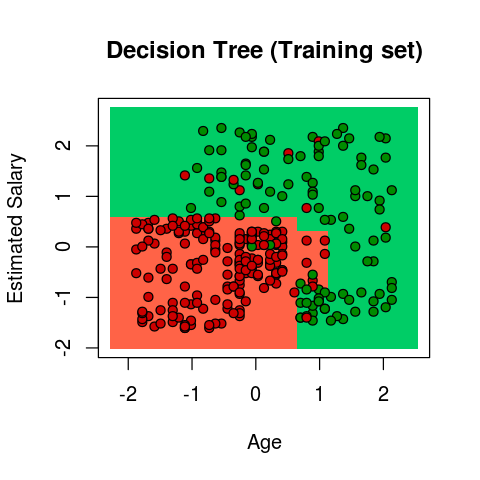

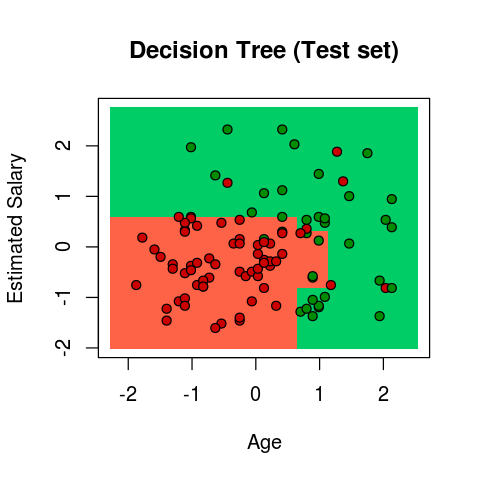

In [22]:
writeLines('\n=== Decision Tree ===')
my_classifier=rpart(formula=Purchased~.,data=training_set,
                    method='class',control=rpart.control(minsplit=1))
writeLines('\nClassifier summary:')
print(summary(my_classifier))
y_pred=predict(my_classifier,newdata=test_set,type='class')
writeLines('\nConfusion matrix:')
print(table(test_set$Purchased,y_pred))
y_pred_grid=predict(my_classifier,newdata=XY_grid,type='class')
plot(df[c('Age','EstimatedSalary')],
     main='Decision Tree (Training set)',
     xlab='Age',ylab='Estimated Salary',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(training_set[c('Age','EstimatedSalary')],pch=21,bg=ifelse(training_set$Purchased==1,'green4','red3'))
plot(df[c('Age','EstimatedSalary')],
     main='Decision Tree (Test set)',
     xlab='Age',ylab='Estimated Salary',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(test_set[c('Age','EstimatedSalary')],pch=21,bg=ifelse(test_set$Purchased==1,'green4','red3'))

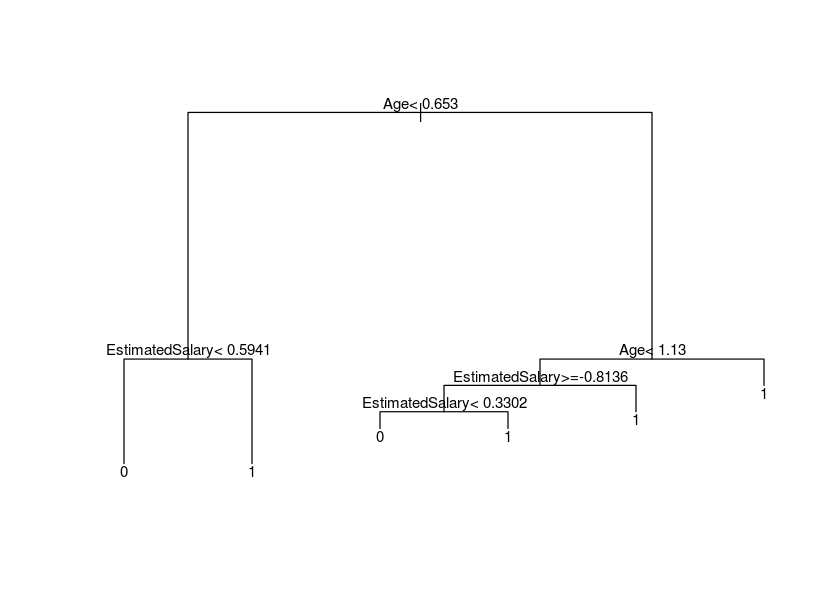

In [48]:
options(repr.plot.width=7,repr.plot.height=5)
plot(my_classifier)
text(my_classifier,cex=0.75)